In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [2]:
!pip install ipython-autotime
%load_ext autotime


time: 594 µs (started: 2021-02-20 19:47:37 +00:00)


In [3]:
data = []
target = []
data1 = '/content/drive/MyDrive/Minor Project for M.L /Healthy human eyes'
data2 = '/content/drive/MyDrive/Minor Project for M.L /Unhealthy human eyes'
for i in os.listdir(data1):
  img = imread(os.path.join(data1,i))
  img_re = resize(img,(150,150,3))
  data.append(img_re.flatten())
  target.append(0)
for i in os.listdir(data2):
  img = imread(os.path.join(data2,i))
  img_re = resize(img,(150,150,3))
  data.append(img_re.flatten())
  target.append(1)

time: 3min 8s (started: 2021-02-20 19:47:37 +00:00)


In [4]:
data = np.array(data)
target = np.array(target)

time: 119 ms (started: 2021-02-20 19:50:46 +00:00)


In [5]:
data.shape

(358, 67500)

time: 3.51 ms (started: 2021-02-20 19:50:46 +00:00)


In [6]:
target.shape

(358,)

time: 3.11 ms (started: 2021-02-20 19:50:46 +00:00)


In [7]:
data

array([[1.        , 1.        , 1.        , ..., 0.89803922, 0.75282353,
        0.71752941],
       [0.12376471, 0.07278431, 0.01015216, ..., 0.91043137, 0.68298039,
        0.58886275],
       [0.85026301, 0.68194928, 0.61920418, ..., 0.78823529, 0.72156863,
        0.68615529],
       ...,
       [0.37169569, 0.20306824, 0.02919948, ..., 0.43362092, 0.51205229,
        0.02185621],
       [0.80158301, 0.52512549, 0.39117778, ..., 0.91294118, 0.95215686,
        0.96      ],
       [0.83118305, 0.68216344, 0.50569285, ..., 0.89234697, 0.82096135,
        0.76355608]])

time: 4.66 ms (started: 2021-02-20 19:50:46 +00:00)


In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

time: 7.34 ms (started: 2021-02-20 19:50:46 +00:00)


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=177)

time: 289 ms (started: 2021-02-20 19:50:46 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
p = [
              {'C':[1,10,100],'kernel':['linear','rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,p)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 13min 34s (started: 2021-02-20 19:50:46 +00:00)


In [11]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1])

time: 2.52 s (started: 2021-02-20 20:04:20 +00:00)


In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0])

time: 3.48 ms (started: 2021-02-20 20:04:23 +00:00)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.8111111111111111

time: 3.84 ms (started: 2021-02-20 20:04:23 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[33,  5],
       [12, 40]])

time: 5.06 ms (started: 2021-02-20 20:04:23 +00:00)


In [15]:
import pickle
pickle.dump(clf,open('mini_model.p','wb'))

time: 481 ms (started: 2021-02-20 20:04:23 +00:00)


In [16]:
model = pickle.load(open('mini_model.p','rb'))

time: 114 ms (started: 2021-02-20 20:04:23 +00:00)


enter file path/content/drive/MyDrive/th-2.jpeg
Eye is unhealthy


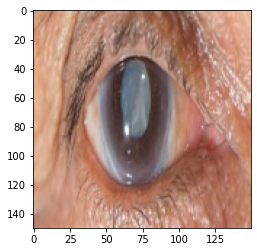

time: 3min 38s (started: 2021-02-20 20:04:24 +00:00)


In [17]:
import matplotlib.pyplot as plt
new_data = []
data = input('enter file path')
img = imread(data)
img_re = resize(img,(150,150,3))
new_data.append(img_re.flatten())
new_data = np.array(new_data)
plt.imshow(img_re)
output = model.predict(new_data)
if output==0:
  print('Eye is healthy')
else:
  print('Eye is unhealthy')